# Data Analysis and Prediction of an "AD CLICK"
## Using Kernel Support Vector Machines
             

  --Arhit Bose Tagore

In the below Data Analysis, I will be analyzing and predicting if a given user will click on a particular ad or not. This task can be done with the help of Kernel Support Vector Machine.


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use("dark_background")

### Importing the Train Dataset 

In [2]:
train_df = pd.read_csv("train_.csv")
df = train_df

### Glance of the DataSet

In [3]:
train_df

,Unnamed: 0,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,2,15706,320,50,1722,0,35,-1,79
1,1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15704,320,50,1722,0,35,100084,79
2,2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15704,320,50,1722,0,35,100084,79
3,3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15706,320,50,1722,0,35,100084,79
4,4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,1.311196e+19,0,14102103,1005,0,85f751fd,c4e18dd6,50e219e0,53de0284,...,1,0,21611,320,50,2480,3,299,100111,61
499996,499996,1.311197e+19,0,14102103,1005,1,d9750ee7,98572c79,f028772b,ecad2386,...,1,0,17614,320,50,1993,2,1063,-1,33
499997,499997,1.311202e+19,0,14102103,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,...,1,0,20633,320,50,2374,3,39,-1,23
499998,499998,1.311205e+19,0,14102103,1005,1,5b4d2eda,16a36ef3,f028772b,ecad2386,...,1,0,20355,216,36,2333,0,39,100077,157


### Inference:
We can observe that the dataset consists of 500000 rows across 25 different attributes

### Cleaning and Filtering the data

In [4]:
df = df.drop_duplicates() 
df.duplicated().values.any()  #Finding any duplicates

False

In [5]:
df = df.fillna(method="ffill")
pd.isnull(df).any()  # Checking for Null Values

Unnamed: 0          False
id                  False
click               False
hour                False
C1                  False
banner_pos          False
site_id             False
site_domain         False
site_category       False
app_id              False
app_domain          False
app_category        False
device_id           False
device_ip           False
device_model        False
device_type         False
device_conn_type    False
C14                 False
C15                 False
C16                 False
C17                 False
C18                 False
C19                 False
C20                 False
C21                 False
dtype: bool

### Adding Features to the data

In [6]:
def to_date_column(df):
    df["dt_hour"] = pd.to_datetime(df["hour"], format="%y%m%d%H")
    df["year"] = df["dt_hour"].dt.year
    df["month"] = df["dt_hour"].dt.month
    df["day"] = df["dt_hour"].dt.day
    df["int_hour"] = df["dt_hour"].dt.hour
    df["is_weekday"] = df["dt_hour"].dt.dayofweek
    df["is_weekend"] = df.apply(lambda x: x["is_weekday"] in [5, 6], axis=1)
to_date_column(df)

Reference: Kaggle

In [7]:
df = df.drop(['Unnamed: 0'], axis=1)

The dataset is clean and can be used for performing EDA

### Understanding and Evaluating the dataset


In [8]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C19,C20,C21,dt_hour,year,month,day,int_hour,is_weekday,is_weekend
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,35,-1,79,2014-10-21,2014,10,21,0,1,False
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,35,100084,79,2014-10-21,2014,10,21,0,1,False
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,35,100084,79,2014-10-21,2014,10,21,0,1,False
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,35,100084,79,2014-10-21,2014,10,21,0,1,False
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,35,-1,157,2014-10-21,2014,10,21,0,1,False


In [9]:
df.tail()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C19,C20,C21,dt_hour,year,month,day,int_hour,is_weekday,is_weekend
499995,1.311196e+19,0,14102103,1005,0,85f751fd,c4e18dd6,50e219e0,53de0284,d9b5648e,...,299,100111,61,2014-10-21 03:00:00,2014,10,21,3,1,False
499996,1.311197e+19,0,14102103,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,1063,-1,33,2014-10-21 03:00:00,2014,10,21,3,1,False
499997,1.311202e+19,0,14102103,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,39,-1,23,2014-10-21 03:00:00,2014,10,21,3,1,False
499998,1.311205e+19,0,14102103,1005,1,5b4d2eda,16a36ef3,f028772b,ecad2386,7801e8d9,...,39,100077,157,2014-10-21 03:00:00,2014,10,21,3,1,False
499999,1.311207e+18,1,14102103,1005,0,2328ee8e,7804dea6,f028772b,ecad2386,7801e8d9,...,39,-1,32,2014-10-21 03:00:00,2014,10,21,3,1,False


In [10]:
df.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,year,month,day,int_hour,is_weekday
count,5.000000e+05,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.0,500000.0,500000.000000,500000.0
mean,9.314806e+18,0.164074,1.410210e+07,1005.034018,0.217276,1.036694,0.223636,18193.167466,319.183992,56.561368,2031.632062,1.109156,201.528508,42639.887130,74.050944,2014.0,10.0,21.0,1.321254,1.0
std,5.213424e+18,0.370343,9.156416e-01,0.966678,0.443134,0.489694,0.669603,3343.557221,21.037074,36.185037,417.213802,1.277892,273.749184,49497.494455,40.835674,0.0,0.0,0.0,0.915642,0.0
min,9.984920e+12,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000,2014.0,10.0,21.0,0.000000,1.0
25%,4.828050e+18,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,15706.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,48.000000,2014.0,10.0,21.0,1.000000,1.0
50%,9.794425e+18,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,18993.000000,320.000000,50.000000,2161.000000,0.000000,39.000000,-1.000000,61.000000,2014.0,10.0,21.0,1.000000,1.0
75%,1.347337e+19,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,20632.000000,320.000000,50.000000,2351.000000,3.000000,297.000000,100084.000000,79.000000,2014.0,10.0,21.0,2.000000,1.0
max,1.844670e+19,1.000000,1.410210e+07,1012.000000,7.000000,5.000000,5.000000,21705.000000,1024.000000,1024.000000,2497.000000,3.000000,1835.000000,100248.000000,195.000000,2014.0,10.0,21.0,3.000000,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                500000 non-null  float64       
 1   click             500000 non-null  int64         
 2   hour              500000 non-null  int64         
 3   C1                500000 non-null  int64         
 4   banner_pos        500000 non-null  int64         
 5   site_id           500000 non-null  object        
 6   site_domain       500000 non-null  object        
 7   site_category     500000 non-null  object        
 8   app_id            500000 non-null  object        
 9   app_domain        500000 non-null  object        
 10  app_category      500000 non-null  object        
 11  device_id         500000 non-null  object        
 12  device_ip         500000 non-null  object        
 13  device_model      500000 non-null  object        
 14  devi

In [12]:
df.nunique()

id                  500000
click                    2
hour                     4
C1                       7
banner_pos               6
site_id               1704
site_domain           1586
site_category           21
app_id                1641
app_domain             122
app_category            20
device_id            41413
device_ip           171304
device_model          3967
device_type              4
device_conn_type         4
C14                    540
C15                      8
C16                      9
C17                    154
C18                      4
C19                     40
C20                    154
C21                     34
dt_hour                  4
year                     1
month                    1
day                      1
int_hour                 4
is_weekday               1
is_weekend               1
dtype: int64

### Shape of Our Dataset

In [13]:
df.shape

(500000, 31)

In [14]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'dt_hour', 'year',
       'month', 'day', 'int_hour', 'is_weekday', 'is_weekend'],
      dtype='object')

The Dataset is spread across 500000 rows and 31 columns which signify the various attributes. Among the 31 attributes 'C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21' show anonymous categorical variables.

The different features of our dataset are:
<ol>
    <li>Click</li>
    <li>Hour</li>
    <li>Banner Position</li>
    <li>Site ID</li>
    <li>Side Domain</li>
    <li>Site Category</li>
    <li>App ID</li>
    <li>App Domain</li>
    <li>App Category</li>
    <li>Device ID</li>
    <li>Device Connection Type</li>
    <li>Month</li>
    <li>Year</li>
    <li>Day</li>
    <li>is_Weekday</li>
    <li>is_Weekend</li>
</ol>

## Exploratory Data Analysis

### Data Visualization

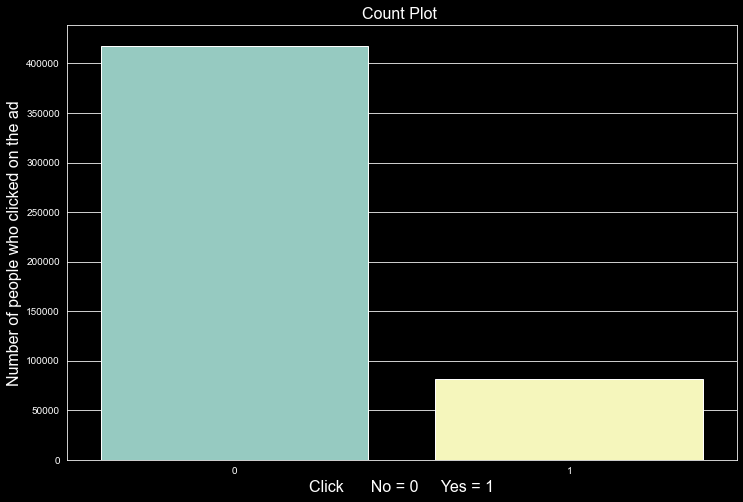

In [15]:
plt.figure(figsize=(12, 8))
sns.color_palette("dark")
sns.countplot(x = "click", data = df)
plt.xlabel('Click      No = 0     Yes = 1', fontsize=16)
plt.ylabel('Number of people who clicked on the ad', fontsize=16)
plt.title('Count Plot ', fontsize=16)
plt.show()

### Inference:
#### From the above plot, we can decipher that more number of people did not click on the ad. The number of people who clicked on the ad are significantly lesser (17,000) when compared to the number of people who clicked on the ad (45,000).

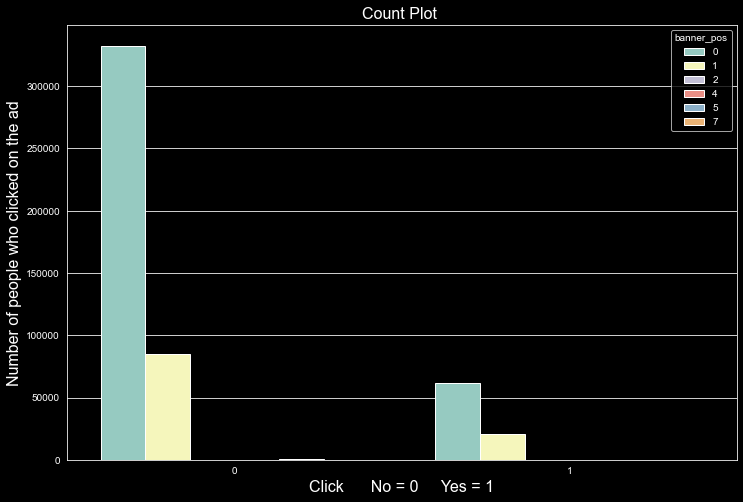

In [16]:
plt.figure(figsize=(12, 8))
sns.color_palette("dark")
sns.countplot(x = "click",hue='banner_pos', data = df)
plt.xlabel('Click      No = 0     Yes = 1', fontsize=16)
plt.ylabel('Number of people who clicked on the ad', fontsize=16)
plt.title('Count Plot ', fontsize=16)
plt.show()

### Inference:
#### From the above plot, we can understand the importance of the banner positions of the ad on the screen. We can  understand that the ads at position 0 and 1 are clearly more significant when compared to the other positions on the screen
#### Among 0 and 1, ad banner at position 1 are more significant, which implies if the ad is present at position 1, then it is more likely to be clicked

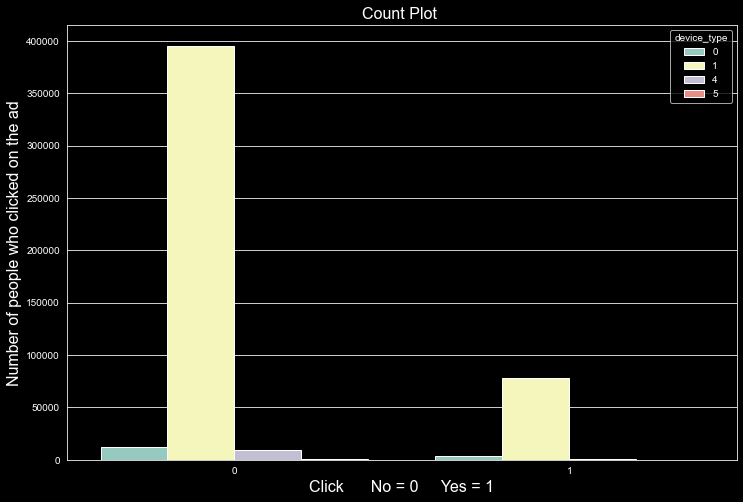

In [17]:
plt.figure(figsize=(12, 8))
sns.color_palette("dark")
sns.countplot(x = "click",hue='device_type', data = df)
plt.xlabel('Click      No = 0     Yes = 1', fontsize=16)
plt.ylabel('Number of people who clicked on the ad', fontsize=16)
plt.title('Count Plot ', fontsize=16)
plt.show()

### Inference:
#### From the above plot, we can understand the importance of the type of device of the ad. We can  understand that the device type 1 is clearly more significant when compared to the other types of device. Hence, device type 1 may represent mobile platform.
#### This is because, a mobile user is more vulnerable to ads. Device type 0 may represent a personal computer system as it is the second most used platform for ads


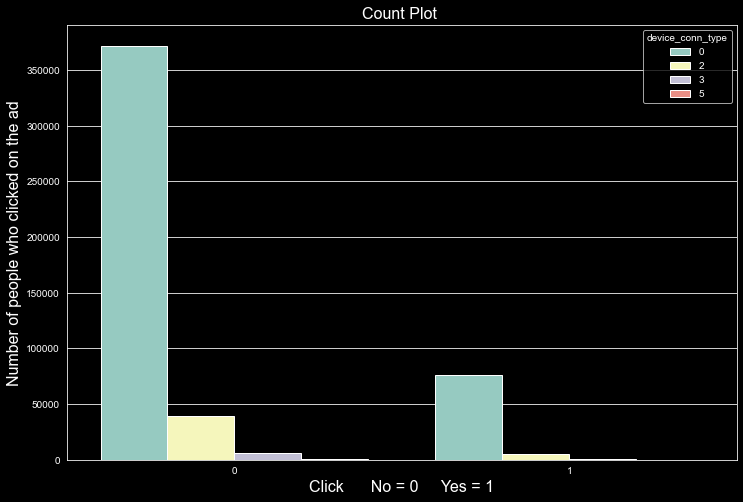

In [18]:
plt.figure(figsize=(12, 8))
sns.color_palette("dark")
sns.countplot(x = "click",hue='device_conn_type', data = df)
plt.xlabel('Click      No = 0     Yes = 1', fontsize=16)
plt.ylabel('Number of people who clicked on the ad', fontsize=16)
plt.title('Count Plot ', fontsize=16)
plt.show()

### Inference:
#### From the above plot, we can understand the importance of the type of device connection type of the ad. We can  understand that the device connection type 0 is clearly more significant when compared to the other types of device connections. Hence, device connection type 0 may represent wireless internet connection platform(Wi-Fi).


In [19]:
freq = df['int_hour'].value_counts()
print(freq)

2    207471
1    137442
0    119006
3     36081
Name: int_hour, dtype: int64


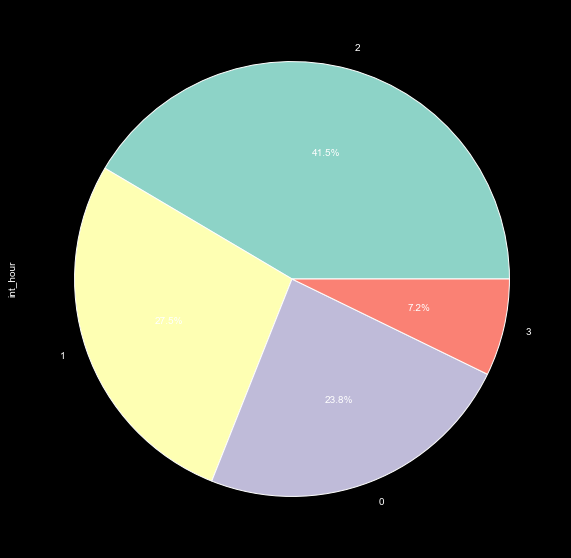

In [20]:
plt.figure(figsize=(18, 10))
freq.plot.pie(autopct="%.1f%%")
plt.show()


### Inference:
#### From the above plot, we can understand the importance of the time when the ad was clicked.

In [21]:
freq2 = df['site_category'].value_counts()
print(freq2)

50e219e0    166816
28905ebd    151280
f028772b    118430
3e814130     43640
76b2941d      5974
335d28a8      4653
f66779e6      3030
0569f928      2511
72722551      1455
75fa27f6      1404
70fb0e29       373
c0dd3be3       259
a818d37a        88
dedf689d        24
e787de0e        18
bcf865d9        17
8fd0aea4        10
42a36e14         8
5378d028         6
9ccfa2ea         3
110ab22d         1
Name: site_category, dtype: int64


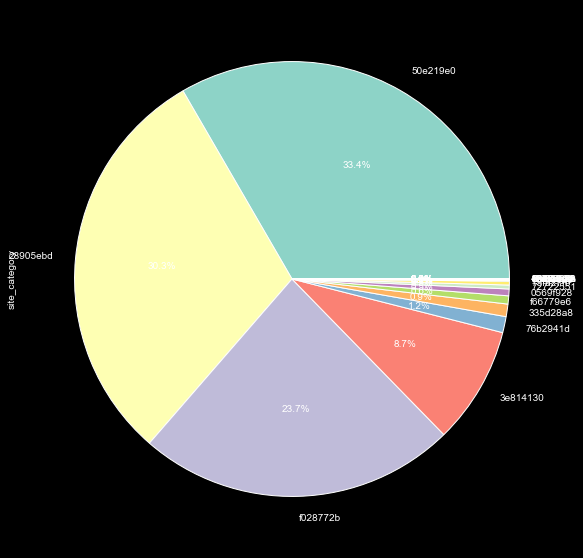

In [22]:
plt.figure(figsize=(18, 10))
freq2.plot.pie(autopct="%.1f%%")
plt.show()

### Inference:
#### From the above plot, we can understand the importance of the type of the site. Basically, the ad is advertised on 4 major categories of the 21 different type. The traffic on these sites may be higher than the rest.

### Plotting Correlation between the target and the variables

In [23]:
df.corr()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,...,C18,C19,C20,C21,year,month,day,int_hour,is_weekday,is_weekend
id,1.000000,0.001731,0.030268,0.003246,0.001691,0.000630,-0.000452,-0.002355,0.001709,-0.000178,...,0.007512,-0.002203,0.003531,-0.004477,NaN,NaN,NaN,0.030268,NaN,NaN
click,0.001731,1.000000,-0.021632,-0.048076,0.037515,-0.044060,-0.043982,-0.124491,-0.036159,0.143976,...,-0.010721,0.014771,-0.024347,-0.092441,NaN,NaN,NaN,-0.021632,NaN,NaN
hour,0.030268,-0.021632,1.000000,0.020758,0.024693,-0.019372,0.026710,0.093217,0.029943,-0.009679,...,0.185520,0.151825,0.065880,-0.235835,NaN,NaN,NaN,1.000000,NaN,NaN
C1,0.003246,-0.048076,0.020758,1.000000,0.284996,0.912793,0.115550,0.124532,0.035379,0.002354,...,0.036299,0.005069,-0.043881,0.062114,NaN,NaN,NaN,0.020758,NaN,NaN
banner_pos,0.001691,0.037515,0.024693,0.284996,1.000000,0.283610,-0.050629,0.049818,-0.041777,-0.076639,...,0.088323,0.254799,0.026637,-0.059591,NaN,NaN,NaN,0.024693,NaN,NaN
device_type,0.000630,-0.044060,-0.019372,0.912793,0.283610,1.000000,0.095444,0.126729,0.038571,-0.004330,...,0.057453,-0.009955,-0.062167,0.078808,NaN,NaN,NaN,-0.019372,NaN,NaN
device_conn_type,-0.000452,-0.043982,0.026710,0.115550,-0.050629,0.095444,1.000000,0.065759,0.103015,-0.020223,...,0.017388,0.072170,0.006939,0.014072,NaN,NaN,NaN,0.026710,NaN,NaN
C14,-0.002355,-0.124491,0.093217,0.124532,0.049818,0.126729,0.065759,1.000000,0.003165,0.023754,...,0.165571,0.282283,0.054521,0.177057,NaN,NaN,NaN,0.093217,NaN,NaN
C15,0.001709,-0.036159,0.029943,0.035379,-0.041777,0.038571,0.103015,0.003165,1.000000,-0.100149,...,-0.035519,0.070527,0.042942,0.073309,NaN,NaN,NaN,0.029943,NaN,NaN
C16,-0.000178,0.143976,-0.009679,0.002354,-0.076639,-0.004330,-0.020223,0.023754,-0.100149,1.000000,...,0.125651,-0.091272,-0.010332,-0.171589,NaN,NaN,NaN,-0.009679,NaN,NaN


In [24]:
mask = np.zeros_like(df.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.,

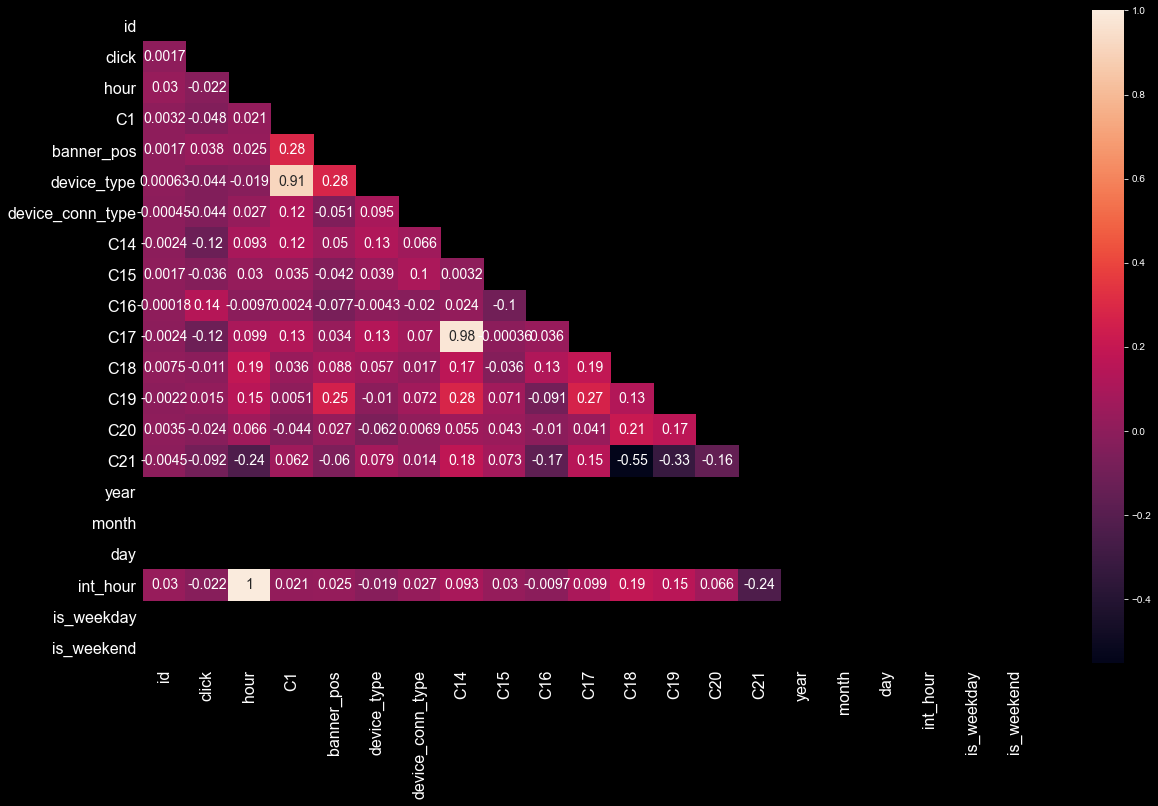

In [25]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 14})
plt.style.use('dark_background')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### We can observe the correlation values between all the columns of the dataset. From the above plot we can observe both positve and negative correlation values

### Label Encoding

In [26]:
label_col = "click"
x_columns = set(list(df.columns)) - set(["id", "site_id", "app_id", "hour", "dt_hour", "device_id", "device_ip", ] + [label_col] )

In [27]:
x_train = df[x_columns]
y_train = df[label_col]

In [28]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder


x_train_len = len(x_train)
d = defaultdict(LabelEncoder)
n_df = x_train.apply(lambda x: d[x.name].fit_transform(x))
n_df.head()

,app_domain,day,C18,C17,is_weekend,is_weekday,C21,site_domain,C16,C1,...,app_category,int_hour,banner_pos,device_model,device_type,C15,month,year,C14,device_conn_type
0,62,0,0,40,0,0,19,1503,2,2,...,0,0,0,1094,1,3,0,0,162,1
1,62,0,0,40,0,0,19,1503,2,2,...,0,0,0,1737,1,3,0,0,160,0
2,62,0,0,40,0,0,19,1503,2,2,...,0,0,0,2134,1,3,0,0,160,0
3,62,0,0,40,0,0,19,1503,2,2,...,0,0,0,1539,1,3,0,0,162,0
4,62,0,0,79,0,0,32,910,2,2,...,0,0,1,1836,1,3,0,0,256,0


In [29]:
n_df.columns

Index(['app_domain', 'day', 'C18', 'C17', 'is_weekend', 'is_weekday', 'C21',
       'site_domain', 'C16', 'C1', 'C19', 'C20', 'site_category',
       'app_category', 'int_hour', 'banner_pos', 'device_model', 'device_type',
       'C15', 'month', 'year', 'C14', 'device_conn_type'],
      dtype='object')

## Training and Test Dataset Split

In [30]:
X = n_df
y = df['click']


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
print(y_train)

482843    1
240542    0
66306     0
331461    0
10635     0
         ..
24140     0
35409     0
457391    1
98247     0
469988    1
Name: click, Length: 400000, dtype: int64


In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
print(X_train)

[[ 0.25172285  0.          1.4818439  ...  0.         -0.20417745
  -0.32278542]
 [-0.53249469  0.          1.4818439  ...  0.         -0.20417745
  -0.32278542]
 [ 0.25172285  0.          0.6989614  ...  0.         -1.88863354
   2.3946639 ]
 ...
 [ 0.25172285  0.          0.6989614  ...  0.         -0.05492185
  -0.32278542]
 [ 0.25172285  0.          1.4818439  ...  0.         -0.70880354
  -0.32278542]
 [ 2.6043755   0.          1.4818439  ...  0.          1.46606382
  -0.32278542]]


## Training the Kernel SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)